### PREGUNTA 4

El archivo Web Server Requests G contiene un conjunto de datos que proporciona un registro histórico (sintético) de la tasa de llegada de solicitudes que un servidor web ha experimentado durante un intervalo de tiempo de 5 minutos. Esta información es esencial para comprender y gestionar la carga del servidor, planificar la infraestructura, y garantizar un rendimiento óptimo
en un entorno de servidor web real.
1. Identificar patrones de tráfico web como horas pico de actividad y momentos de menor demanda.
2. Ajuste una distribución gamma a sus datos de “Arrival Rate”, trace el histograma de sus datos junto con la función de densidad de probabilidad (pdf) de la distribución gamma ajustada y muestre los par´ametros de la distribución gamma ajustada.
3. ¿Cuál es la probabilidad de que el servidor reciba más de 8 solicitudes durante el próximo intervalo?
4. ¿Cuál es la probabilidad de que la tasa de llegada supere un umbral crítico de, por ejemplo, 15 solicitudes por minuto, en el próximo intervalo?
5. Si la capacidad máxima de procesamiento del servidor es de 25 solicitudes por intervalo, ¿Cuál la probabilidad de superar la capacidad máxima de procesamiento del servidor en el siguiente intervalo?

In [12]:
import numpy as np

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gamma

#url = 'https://raw.githubusercontent.com/DCajiao/Distribuciones-de-Probabilidad/main/data/Web_Server_Requests_G.csv?token=GHSAT0AAAAAACRAW2Q6NZNNCWHY6RQI55ZSZQ6UEUQ'
#df = pd.read_csv()
df = pd.read_csv(r"..\data\Web_Server_Requests_G.csv")

In [5]:
df.head()

,Timestamp,Arrival_Rate
0,00:00,1
1,05:00,1
2,10:00,1
3,15:00,7
4,20:00,1


In [ ]:
df.sub

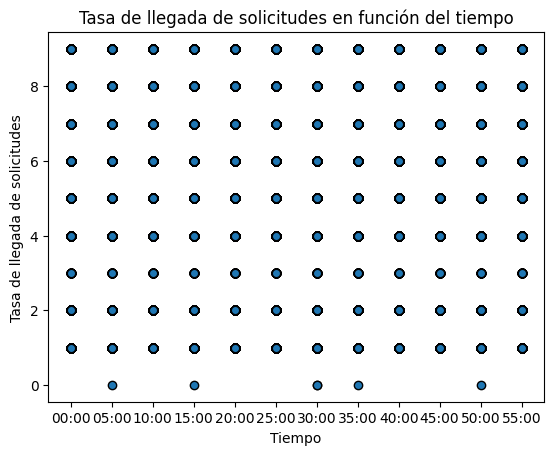

In [32]:
plt.scatter(df['Timestamp'], df['Arrival_Rate'], facecolor='C0', edgecolor='k', marker="o")
plt.xlabel('Tiempo')
plt.ylabel('Tasa de llegada de solicitudes')
plt.title('Tasa de llegada de solicitudes en función del tiempo')
plt.show()

In [10]:
shape, loc, scale = gamma.fit(df['Arrival_Rate'])

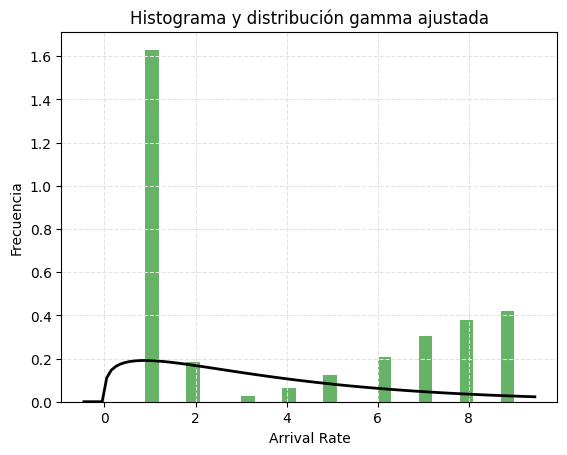

In [23]:
plt.hist(df['Arrival_Rate'], bins=30, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = gamma.pdf(x, shape, loc=loc, scale=scale)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Arrival Rate')
plt.ylabel('Frecuencia')
plt.title('Histograma y distribución gamma ajustada')
plt.grid(linestyle="--", color="#E3E3E3")
plt.show()

In [14]:
print("Parámetros de la distribución gamma ajustada:")
print("Shape:", shape)
print("Loc:", loc)
print("Scale:", scale)


Parámetros de la distribución gamma ajustada:
Shape: 1.2863239035572631
Loc: -0.00010219942177852536
Scale: 3.055955972870093


In [15]:
prob_mas_8_solicitudes = 1 - gamma.cdf(8, shape, loc=loc, scale=scale)
print("Probabilidad de recibir más de 8 solicitudes:", prob_mas_8_solicitudes)

Probabilidad de recibir más de 8 solicitudes: 0.11643528333708753


In [16]:
umbral_critico = 15
prob_supera_umbral = 1 - gamma.cdf(umbral_critico, shape, loc=loc, scale=scale)
print("Probabilidad de superar el umbral crítico de", umbral_critico, "solicitudes:", prob_supera_umbral)

Probabilidad de superar el umbral crítico de 15 solicitudes: 0.013613993294689042


In [17]:
capacidad_maxima = 25
prob_supera_capacidad_maxima = 1 - gamma.cdf(capacidad_maxima, shape, loc=loc, scale=scale)
print("Probabilidad de superar la capacidad máxima de procesamiento del servidor:", prob_supera_capacidad_maxima)

Probabilidad de superar la capacidad máxima de procesamiento del servidor: 0.0005865153311331861
